## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
#Join tables on mouse ID
full_mice_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")

In [4]:
#Find each time instance
times = study_results['Timepoint'].unique()

#Will fill in this list with any duplicate mice to exclude
duplicates = []

#Initiate loop
for time in times:
    
    #Filter to each time period
    temp_time_df = study_results.loc[study_results['Timepoint'] == time, :]

    #Count the instances of each mouce during that time period
    #If a mouse is counted more than once, it's a duplicate
    temp_mice_count = pd.DataFrame([temp_time_df['Mouse ID'].value_counts()])

    temp_mice_count = temp_mice_count.transpose()

    #Filter to the duplicate mice (where count > 1)
    extra_mice = temp_mice_count.loc[temp_mice_count['Mouse ID'] > 1, :]

    #Add duplicate mouse ID to dupicate list
    if extra_mice.empty == False:
        for row in extra_mice:
            duplicates.append(extra_mice.index[0])
            

In [5]:
# Create a clean DataFrame by dropping all data associated with the duplicate mouse by its ID.

#Loop through each value in the duplicates list
for mouse in duplicates:
    
    #Select only those rows which do not contain the current iterated value in duplicates
    clean_mouse_data = full_mice_data.loc[full_mice_data["Mouse ID"] != mouse, :]

clean_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


## Summary Statistics

In [6]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#Get drug names for loop
drugs = clean_mouse_data["Drug Regimen"].unique()

#Headers on the summary table
summary_df = pd.DataFrame({"Drug": [], 
                          "Mean": [], "Median": [], "Variance": [], "Standard Deviation": [], "Standard Error": []})

#Begin loop for each drug
for drug in drugs:
    
    #Filter to a signle drug
    temp_drug_df = clean_mouse_data.loc[clean_mouse_data["Drug Regimen"] == drug, :]

    #Caluclate summary stats
    drug_mean = temp_drug_df["Tumor Volume (mm3)"].mean()
    drug_median = temp_drug_df["Tumor Volume (mm3)"].median()
    drug_variance = np.var(temp_drug_df["Tumor Volume (mm3)"])
    drug_stdev = np.std(temp_drug_df["Tumor Volume (mm3)"])
    drug_sem = sem(temp_drug_df["Tumor Volume (mm3)"])
    
    #Add each summary data point to the summary data frame
    summary_df = summary_df.append({"Drug": drug, "Mean": drug_mean, "Median": drug_median,
                                   "Variance": drug_variance, "Standard Deviation": drug_stdev,
                                   "Standard Error": drug_sem}, ignore_index=True)

#Set drug as index for clarity
summary_df.set_index('Drug', inplace = True)

summary_df

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug,,,,,
Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
Zoniferol,53.236507,51.818479,48.266689,6.947423,0.516398
Propriva,52.320930,50.446266,43.555716,6.599675,0.544332
Placebo,54.033581,52.288934,60.830138,7.799368,0.581331


## Bar and Pie Charts

(0, 255)

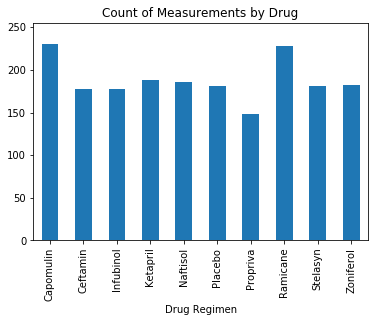

In [20]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#Group by drug to get counts
drugs_grouped = clean_mouse_data.groupby("Drug Regimen").count()

#Filter only to timepoint to count how many times each drug was administered
measurements_count = drugs_grouped["Timepoint"]

#Plot
measurements_count.plot(kind='bar')

#Adding Title, Limits, etc
plt.title("Count of Measurements by Drug Regimen")
plt.ylim(0, 255)


(0, 255)

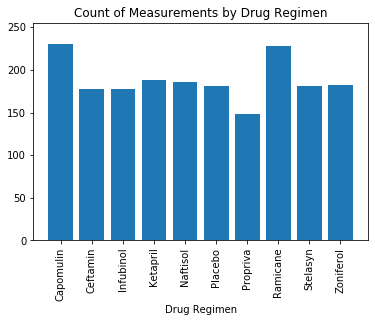

In [42]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

#Set x-axis as numerical value (because I want to  adjust the tilt of the drug titles)
x_axis = np.arange(len(drugs))
tick_locations = [value for value in x_axis]

#Plot using plt.bar
plt.bar(tick_locations, measurements_count)

#Drugs list needs sorted alphabetically as that's how measurements_count is sorted
arr_drugs = np.sort(drugs)

#Set xticks to the drug regimen, rotated vertically
plt.xticks(tick_locations, arr_drugs, rotation="vertical")

#Adding Title, Limits, etc
plt.title("Count of Measurements by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylim(0, 255)

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for a for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)